CLASSIFICATION PROBLEMS
Types
	- Naïve Bayes
	- Support Vector Machines
	- Tree Based Model
	- Logistic Regression
	
Problem Statement / Features / Training / Test
Problem = Assign a Category or Label
Features = The problem instance represented using Numeric variables 
Training = Use training data to build a classifier
Test = Assign a label for a new instance

Problem Instance -> Classifier -> Label
|Classifier| <-> |Training Data|
Training Data is composed of a Tuple (Features, Label)
All data needs to be represented numerically and then labelled

Naïve Bayes Algorithm for Sentiment Analysis
Comment -> Classifier -> Good/Bad
A Corpus of pre-labelled data for training 
Computer the Positive and Negative percentage for every word in every text in the Corpus
POS(Happy) = Sum Freq of Happy in POS comments/Sum Freq of Happy in entire Corpus
NEG(Happy) = 1 - POS(Happy)
This give you the overall % for POS vs NEG in the Corpus
AND the % for POS vs NEG of every work
For a new Comment we calculate the POS and NEG scores and compare
POScomment = POSword1 * POSword2 * POSwordN * POSoverall = POS
NEGcomment = NEGword1 * NEGword2 * NEGwordN * NEGoverall = NEG

Naïve assumes each word contributes independently (no grouping)
Works with little training data or domain knowledge
 
Sentiment labelled data set - IMDB/Amazon/Yelp - Review and Label (1,0) https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
Download Anaconda
Open Navigator Prompt
>jupyter notebook

http://localhost:8888/notebooks/Naive%20Bayes%20Sentiment%20Analysis.ipynb

CLASSIFICATION USING NAÏVE BAYES 
(SUPERVISED)
Numpy - > from sklearn.feature_extraction.text import CountVectorizer

Can classify into any number of categories
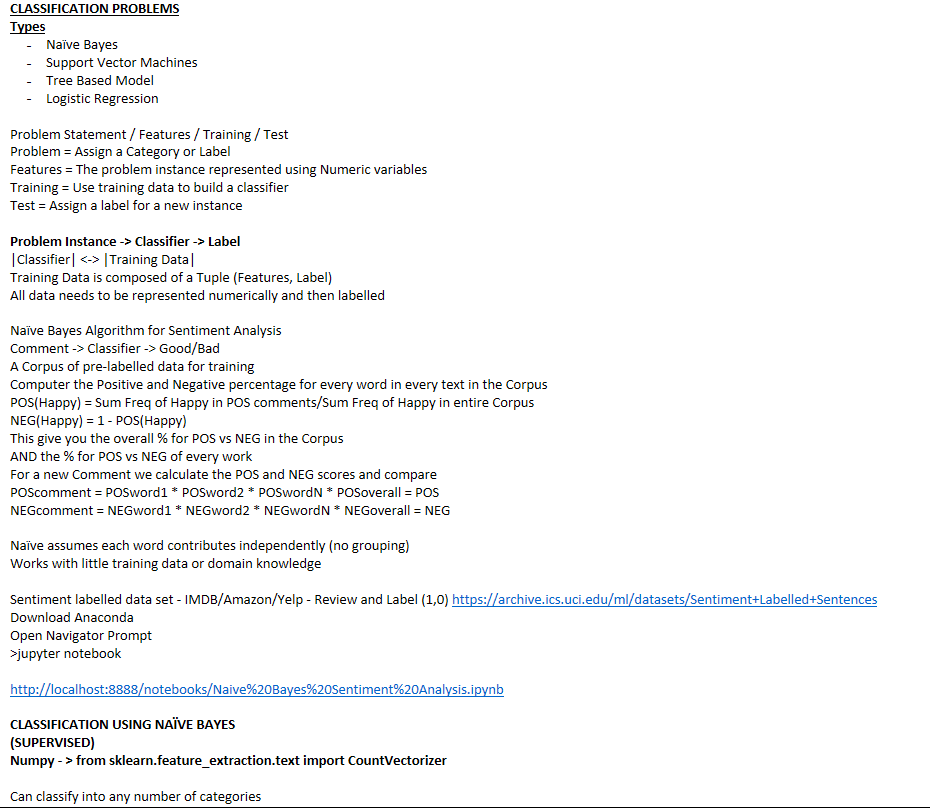

In [2]:
with open("c:/pluralsight/datasets/sentiment labelled sentences/imdb_labelled.txt", "r") as text_file: lines = text_file.read().split('\n')

In [5]:
lines

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0',
 'Very little music or anything to speak of.  \t0',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1',
 "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0",
 'Wasted two hours.  \t0',
 'Saw the movie today and thought it was a good effort, good messages for kids.  \t1',
 'A bit predictable.  \t0',
 'Loved the casting of Jimmy Buffet as the science teacher.  \t1',
 'And those baby owls were adorable.  \t1',
 "The movie showed a lot of Florida at it's best, made it l

In [6]:
with open("/pluralsight/sentiment labelled sentences/yelp_labelled.txt", "r") as text_file: lines = text_file.read().split('\n')
with open("/pluralsight/sentiment labelled sentences/amazon_cells_labelled.txt", "r") as text_file: lines = text_file.read().split('\n')

In [7]:
lines

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0',
 'Good case, Excellent value.\t1',
 'Great for the jawbone.\t1',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0',
 'The mic is great.\t1',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0',
 'If you are Razr owner...you must have this!\t1',
 'Needless to say, I wasted my money.\t0',
 'What a waste of money and time!.\t0',
 'And the sound quality is great.\t1',
 'He was very impressed when going from the original battery to the extended battery.\t1',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0',
 'Very good quality though\t1',
 'The design is very odd, as the ear "clip" is not very comfortable at all.\t0',
 'Highly recommend for any one wh

In [8]:
lines = [line.split("\t") for line in lines if len(line.split("\t"))==2 and line.split("\t")[1]!=' ']

In [9]:
lines

[['So there is no way for me to plug it in here in the US unless I go by a converter.',
  '0'],
 ['Good case, Excellent value.', '1'],
 ['Great for the jawbone.', '1'],
 ['Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
  '0'],
 ['The mic is great.', '1'],
 ['I have to jiggle the plug to get it to line up right to get decent volume.',
  '0'],
 ['If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
  '0'],
 ['If you are Razr owner...you must have this!', '1'],
 ['Needless to say, I wasted my money.', '0'],
 ['What a waste of money and time!.', '0'],
 ['And the sound quality is great.', '1'],
 ['He was very impressed when going from the original battery to the extended battery.',
  '1'],
 ['If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
  '0'],
 ['Very good quality though', '1'],
 ['The design is very odd, as the ear "clip" i

In [10]:
train_documents = [line[0] for line in lines ]
train_documents

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.',
 'And the sound quality is great.',
 'He was very impressed when going from the original battery to the extended battery.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 'Very good quality though',
 'The design is very odd, as the ear "clip" is not very comfortable at all.',
 'Highly recommend for any one who has a blue tooth phone.',
 'I advise EVERYO

In [11]:
train_labels = [int(line[1]) for line in lines ]
train_labels 

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,


In [12]:
from sklearn.feature_extraction.text import CountVectorizer 

In [13]:
count_vectorizer = CountVectorizer(binary='true')
train_documents = count_vectorizer.fit_transform(train_documents)

In [14]:
train_documents

<1000x1847 sparse matrix of type '<class 'numpy.int64'>'
	with 9130 stored elements in Compressed Sparse Row format>

In [16]:
print(train_documents[0])

  (0, 367)	1
  (0, 233)	1
  (0, 711)	1
  (0, 1702)	1
  (0, 1714)	1
  (0, 1604)	1
  (0, 762)	1
  (0, 814)	1
  (0, 857)	1
  (0, 1212)	1
  (0, 1640)	1
  (0, 993)	1
  (0, 653)	1
  (0, 1766)	1
  (0, 1074)	1
  (0, 854)	1
  (0, 1609)	1
  (0, 1491)	1


In [17]:
# Training Phase
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB().fit(train_documents,train_labels)

In [19]:
#Test Phase - note we need to vectorize the sentence to transform
classifier.predict(count_vectorizer.transform(["this is the best movie"]))

array([1])

In [20]:
#Test Phase - note we need to vectorize the sentence to transform
classifier.predict(count_vectorizer.transform(["this is the worst movie"]))

array([0])

In [21]:
#Test Phase - note we need to vectorize the sentence to transform
classifier.predict(count_vectorizer.transform(["this is a bad movie"]))

array([0])

In [22]:
#Test Phase - note we need to vectorize the sentence to transform
classifier.predict(count_vectorizer.transform(["this is the wonderful movie"]))

array([1])

In [23]:
#Test Phase - note we need to vectorize the sentence to transform
classifier.predict(count_vectorizer.transform(["this is the crap movie"]))

array([0])